# Lecture 9 Part 2 - Introduction to Mixture Models & Gaussian Mixture Models (GMM)

What if the data for a *single class* looks like the plot below?

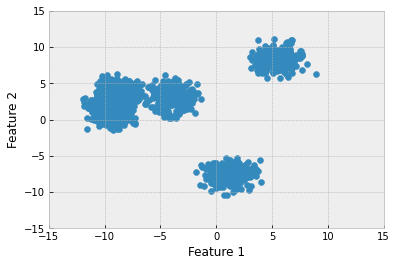

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples = 1500, centers = 5)

plt.scatter(data[:,0],data[:,1]); plt.axis([-15,15,-15,15])
plt.xlabel('Feature 1'); plt.ylabel('Feature 2');

If we assume a single Gaussian distribution, we would obtain a very poor estimate of the true underlying data likelihood.

# Mixture Models

We can better represent this data with a **mixture model**:

$$p(x|\Theta) = \sum_{k=1}^K \pi_k P(x|\Theta_k)$$

where $\Theta = \{\Theta_k\}_{k=1}^K$ are set of parameters that define the distributional form in the probabilistic model $P(\bullet|\Theta_k)$ and 

\begin{align*}
0 & \leq \pi_k \leq 1\\
& \sum_k \pi_k = 1
\end{align*}

# Gaussian Mixture Models

A **Gaussian Mixture Model** or **GMM** is a probabilistic model that assumes a data likelihood to be a weighted sum of Gaussian distributions with unknown parameters.

$$p(\mathbf{x}|\Theta) = \sum_{k=1}^K \pi_k N(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)$$

where $\Theta=\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K$, $0 \leq \pi_k \leq 1$ and $\sum_{k=1}^K \pi_k = 1$.

* When standard distributions (such as Gamma, Exponential, Gaussian, etc.) are not sufficient to characterize a *complicated* data likelihood, we can instead characterize it as the sum of weighted Gaussians distributions

* Another way that GMMs are most commonly used for is to partition data in subgroups

___

# Modeling a Data Likelihood as a Gaussian Mixture Model

* GMMs can be used to learn a complex distribution that represent a dataset. Thus, it can be used within the probabilistic generative classifier framework to model complex data likelihoods.

* GMMs are also commonly used for **clustering**. Here a GMM is fit to a dataset with the goal of partitioning it into clusters.

**<font color=blue>Step 1</font>**

Describe the **observed data likelihood**, $\mathcal{L}^o$. As seen last class:

\begin{align*}
\mathcal{L}^0 = \prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)
\end{align*}

**<font color=blue>Step 2</font>**

Describe the log-likelihood function:

\begin{align*}
\mathcal{L} &= \ln\left(\prod_{i=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)\right)\\
\iff \mathcal{L} &= \sum_{i=1}^N \ln \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k) \right)
\end{align*}

**<font color=blue>Step 3</font>**

Optimize for the parameters $\Theta=\{\pi_k, \mu_k,\Sigma_k\}_{k=1}^K$

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mu_k} = 0, \frac{\partial \mathcal{L}}{\partial \Sigma_k} = 0, \text{ and }, \frac{\partial \mathcal{L}}{\partial \pi_k} = 0
\end{align*}

but this is a difficult problem to maximize!

* A common approach for estimating the parameters of a GMM given a data set is by using the **Expectation-Maximization (EM) algorithm**.

---

## Applications of Mixture Models

* **Data Representation and Inference**. Represent *any* data set using a complex distribution. You may want to describe your data with a distribution but the data does not fit into a standard form (e.g. Gamma, Gaussian, Exponential, etc.), then you can use a (Gaussian) Mixture Model to describe the data. Having a representation of your data in a distribution form is a very powerful tool that, other than having a model of the data, allows you infer about new samples, make predictions, etc.
    * Having a parametric form for a real world model, allows us to apply it in simulation and use it for designing/optimizing decision-making solutions.

* **Clustering.** Partition the data into groups. Note that in the GMMs formulation we did not add the concept of labels/targets. So GMMs are an **unsupervised learning** model. It represents the data with a very complex likelihood and then we can decompose that likelihood to partition the data into categories. This is also known as **clustering**.

---